In [3]:
import numpy as np
from numpy import linalg as LA

### Уровень 0

In [4]:
# Диагональная ортогональная, верхнетреугольная с нулевыми элементами выше диагонали, нижнетреугольная с нулевыми элементами ниже главной диагонали
M = np.diag([1,-1,-1])

In [5]:
M

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [6]:
M.transpose()

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [7]:
# Произведние ортогональной матрицы на транспонированную равно еденичной. Проверка
M@M.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [8]:
# Матрица с детерминантом = 1
M_1 = np.array([[1, -1, 1], [-4, 2, -3], [5, -2, 3]])
M_1

array([[ 1, -1,  1],
       [-4,  2, -3],
       [ 5, -2,  3]])

In [9]:
# Детерминант матрицы М_1
# Округляем до целого, поскольку алгоритм используемый программой быстрее, но вычисляет неточно
# Det(M_1) = 1*2*3 - 1*(-2)*(-3) - (-1)*(-4)*3 + (-1)*(-3)*5 + 1*(-4)*(-2) - 1*2*5 = 1
round(np.linalg.det(M_1))

1

In [10]:
# Собственные значения и собственные вектора
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [11]:
# Нахождени СЗ и СВ
w,v = LA.eig(m)

In [12]:
# Собственные значения
print('Собственные значения:')
print(w)

Собственные значения:
[1. 4.]


In [13]:
# Собственные вектора
print('Собственные вектора:')
print(v)

Собственные вектора:
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [14]:
# Проверим выполнение АХ = lmd*X

In [15]:
m @ v

array([[-0.89442719, -2.82842712],
       [ 0.4472136 , -2.82842712]])

In [16]:
w*v

array([[-0.89442719, -2.82842712],
       [ 0.4472136 , -2.82842712]])

### Уровень 1

In [17]:
# Спектральное разложение

In [18]:
Mtx = np.array([[1, 2],
              [2,3]])

In [19]:
a, U = LA.eig(Mtx)
print('Собственные значения:')
print(np.array(a, dtype=float))
print('\nСобственные вектора:')
print(U)

Собственные значения:
[-0.23606798  4.23606798]

Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [20]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


In [21]:
# Качество восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA

In [32]:
from sklearn.datasets import load_digits              # Для получения данных
from sklearn import decomposition                     # для метода РСА
from sklearn.metrics import mean_squared_error        # для метода средней ошибки
import matplotlib.pyplot as plt                       # для построения графика

In [23]:
digits = load_digits()

X = digits.data # входные данные
y = digits.target # output data

In [24]:
# Применяем РСА
pca = decomposition.PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [25]:
X_pca = pca.fit_transform(X)

In [26]:
# Восстанавливаем данные
X_rstd = pca.inverse_transform(X_pca)

In [27]:
mean_squared_error(X, X_rstd)

7.619390865909778

In [29]:
comp = 2
N = []
MSE = []
while comp < 50:
    pca = decomposition.PCA(n_components=comp)
    pca.fit(X)
    X_pca = pca.fit_transform(X)
    X_rstd = pca.inverse_transform(X_pca)
    N.append(comp)
    MSE.append(mean_squared_error(X, X_rstd))
    comp +=2

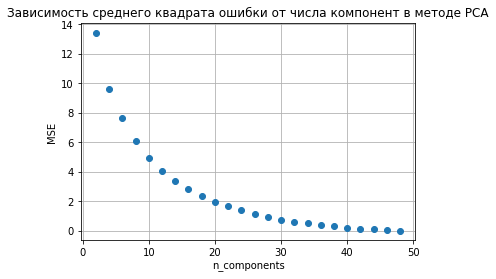

In [39]:
plt.plot(N, MSE, "o")
plt.title('Зависимость среднего квадрата ошибки от числа компонент в методе РСА')
plt.xlabel("n_components")
plt.ylabel("MSE")
plt.grid()